<a href="https://colab.research.google.com/github/mavivi95/Notebooks/blob/main/EDCO2_laboratorio_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

<br>
<center>  <strong> <font face="Courier New" size=6 color='#EDF01C'> Laboratorio Guiado Redes Neuronales Convolucionales</font> </strong> </center>

<br>
<center>
 <p>
 Manuela Viviana Chacón Chamorro </p>
</center>

---

# 1. Introducción a la librería Keras

Keras es una librería de código abierto de alto nivel para la creación y entrenamiento de modelos de redes neuronales artificiales. Se ha convertido en una herramientas muy popular en el campo del aprendizaje profundo debido a su facilidad de uso y flexibilidad. La librería fue desarollada por Francois Chollet, la liberia se lanzó con una primera versión en el año 2015. En 2017, la librería de Keras fue incorporada en TensorFlow, librería desarrollado por Google para aprendizaje automático. Según el sitio oficial, Keras se caracteriza por se amigable con el usuario, modular y configurable y fácil de extender.  



In [1]:
# Celda con la importación de librerias

import tensorflow as tf         # Importar TensorFlow
from tensorflow import keras    # Importar la API Keras de TensorFlow

import numpy as np              # Librería para trabajar don datos matriciales

import matplotlib.pyplot as plt # Librería para gráficas y visualización

## 1.1 Construcción de modelos neuronales

Keras permite la creación de una variedad de modelos neuronales, que incluyen perceptrones multicapa (MLP), redes neuronales convolucionales (CNN), redes neuronales recurrentes (RNN) y algunos modelos generativos adversarios (GAN). Para construir estos modelos, Keras ofrece una colección diversa de capas, cada una con una función específica. Por ejemplo, las capas densas `Dense` son utilizadas en redes completamente conectadas, mientras que las capas convolucionales `Conv2D` permiten configurar capas de convolución. Los modelos se pueden definir de manera secuencial, lo que implica apilar las diferentes capas del modelo, definiendo las características específicas de cada una. En las siguientes secciones, exploraremos cómo utilizar Keras para construir varios tipos de modelos neuronales, centrándonos en particular en los modelos convolucionales.

In [2]:
# De esta forma importamos la clase que permite la creación secuencial de modelos
from keras.models import Sequential

In [3]:
# Para importar las capas se toma de keras.layers las clases que se necesiten
# Input: para la capa de entrada
# Dense: para capas completamente conectadas
# Conv2D: para capas convolucionales aplicadas a dominios 2D
# MaxPooling: para capas de pooling en dominios 2D
# Flatten: para capas de aplanamiento, es decir pasar de datos 2D a 1D
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

In [4]:
# La libería tambien permite generar diagramas de los modelos construidos
# para activar esta función se puede importar la clase plot_model de keras.utils
from keras.utils import plot_model

Una vez que hemos importado las bibliotecas necesarias, estamos listos para comenzar a construir nuestros modelos neuronales. En Keras, la construcción de un modelo es un proceso estructurado y flexible. Comenzamos inicializando un modelo utilizando la clase `Sequential()`. A través del método `.add()`, podemos ir agregando las capas necesarias al modelo y configurando sus parámetros según nuestros requisitos específicos.

A continuación, exploraremos algunos ejemplos de modelos neuronales. Para cada uno de ellos, proporcionaremos un resumen de su arquitectura y generaremos un diagrama que visualiza su estructura. Esta visualización nos ayudará a comprender mejor cómo se construyen y conectan las capas, además de establecer el número de parámetros que se ajustarán durante el proceso de entrenamiento.

In [ ]:
"""
Creación de un modelo neuronal completamente conectado para una entrada de dimensión 500,
y para resolver una tarea de clasificación para un problema de tres clases. El modelo que
se construye solo tiene una capa oculta.
"""

# El modelo se inicializa con la clase Sequential
model = Sequential()

# Se agrega con .add la capa de entrada, incluyendo en shape la dimensión de los datos de entrada
model.add(Input(shape=(500,)))

# Se agrega con .add la capa completamente conectada, para esta capa se debe definir el
# número de neuronas y la naturaleza de las funciones de activación, en este caso se han
# fijado 128 neuroas y como función de activación ReLu
model.add(Dense(128, activation='relu'))

# Se agrega con .add la capa de salida, para esta capa se debe definir el
# número de neuronas, al ser un problema de clasificación se puede usar tantas neuronas
# como clases, y asignar la función de activación softmax
model.add(Dense(3, activation='softmax'))

In [ ]:
# El método summary() permite visualizar un resumen del modelo, en este resumen se
# indican la cantidad de parámetros del modelo, el tipo de capa, y la dimensión de
# salida de cada capa.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,515 (252.01 KB)

 Trainable params: 64,515 (252.01 KB)

 Non-trainable params: 0 (0.00 B)

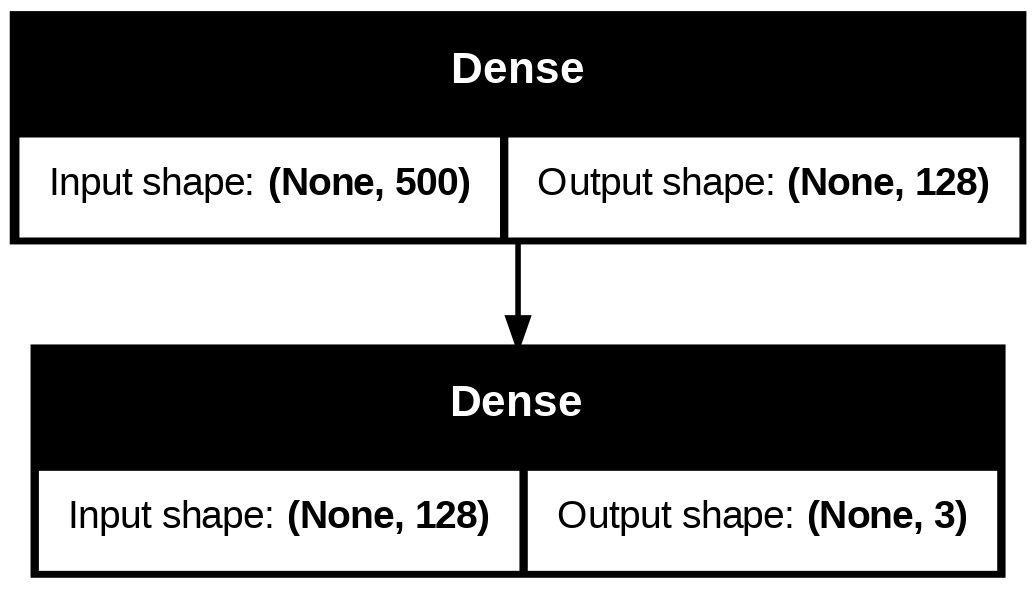

In [ ]:
# Para visualizar la estructura del modelo se puede usar la clase plot_model,
# previamente se habia cargado esta clase en las librerias. Al visualizar el
# modelo tambien se puede guardar o exportar la imagen resultante.

# Parámetros plot_model:
# modelo = modelo neuronal de keras
# to_file = nombre del archivo de la imagen del diagrama
# show_shapes = parámetro binario para definir si se muestran las dimensiones
# show_layer_names = parámetro binario para definir si se incluyen los nombres de las capas
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
"""
Creación de un modelo neuronal completamente conectado para una entrada de dimensión 2D,
de tamaño 20x20. Para resolver una tarea de clasificación binaria. El modelo que
se construye tiene 3 capas ocultas.
"""


model = Sequential()      # Llamado al clase secuencial para la inicialización del modelo

# Dado que la entrada a este modelo es una forma de dimensión 2D, con tamaño 20x20 se
# inicia con una capa Flatten, o capa de aplanamiento, esta capa puede recibir este tipo
# de estructuras y convertirlas en formas 1D, en este caso una forma de dimensión 100.
model.add(Flatten(input_shape=(20, 20)))

# Capas ocultas
model.add(Dense(128, activation='relu'))  # Capa densa con 128 neuronas y activación ReLu
model.add(Dense(64, activation='relu'))   # Capa densa con 64 neuronas y activación ReLu
model.add(Dense(32, activation='relu'))   # Capa densa con 32 neuronas y activación ReLu

# Capa de salida
# Al ser un problema binario se considera una neurona y una activación tipo sigmoide
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary() # Método summary() para visualizar un resumen del modelo

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,697 (241.00 KB)

 Trainable params: 61,697 (241.00 KB)

 Non-trainable params: 0 (0.00 B)

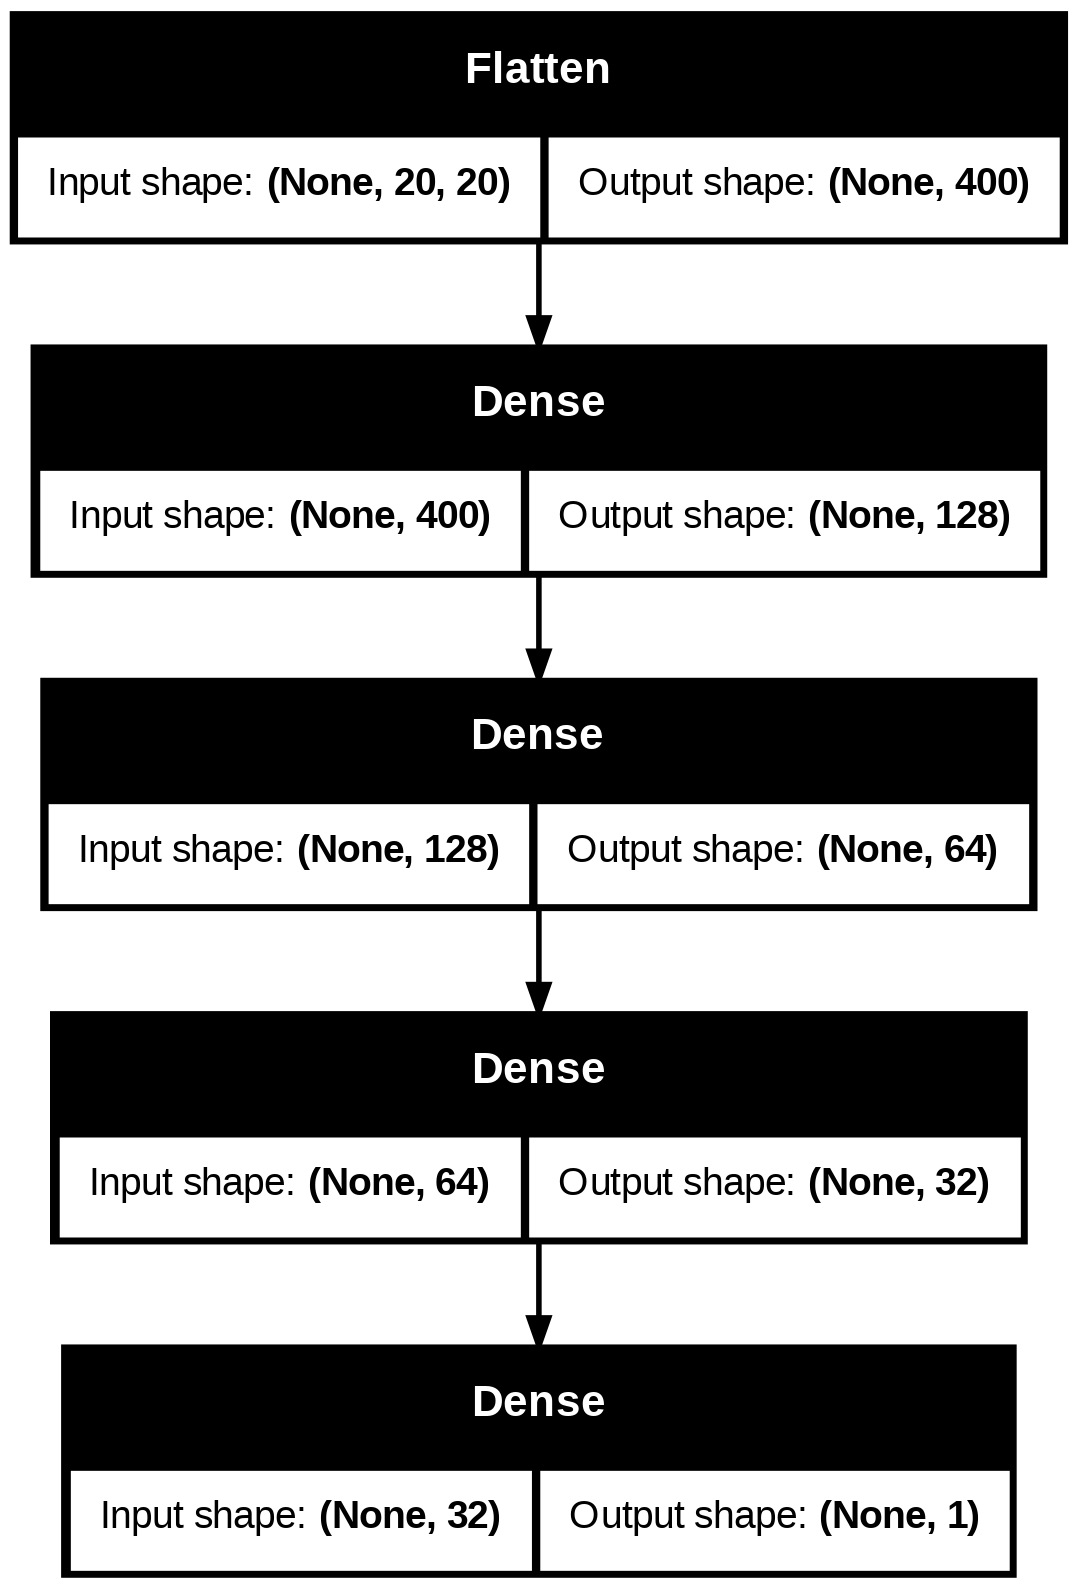

In [ ]:
# Para visualizar el modelo usando plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
"""
Las redes neuronales tambien pueden utilizarse
para problemas de regresión, en este caso se presenta un ejemplo de una estructura.
En este apartado se crea un modelo neuronal completamente conectado para una entrada de
dimensión 2D de tamaño 10x10, para resolver una tarea de regresión. El modelo que
se construye tiene 2 capas ocultas y como función de activación en la capa de salida
se incluye la función lineal.
"""

# Llamado al clase secuencial para la inicialización del modelo
# En keras tambien se puede fijar el nombre del modelo, en este caso se fijo en
# "Modelo de regresión"
model = Sequential(name = 'Modelo de regresión')

# Capa de aplanamiento. A las capas tambien se le puede agregar nombres, esto puede ser
# útil para identificarlas más facilmente
model.add(Flatten(input_shape=(10, 10), name = 'Aplanamiento'))

# Capas ocultas con nombre
model.add(Dense(64, activation='relu', name = 'Densa_1'))
model.add(Dense(32, activation='relu', name = 'Densa_2'))

# Capa de salida con función de activación lineal para regresión
model.add(Dense(1, activation='linear', name = 'Salida'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Método summary() para visualizar un resumen del modelo, como en este modelo se fijaron
# los nombres se pueden observar en el resumen.
model.summary()

Model: "Modelo de regresión"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Aplanamiento (Flatten)          │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Densa_1 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Densa_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Salida (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

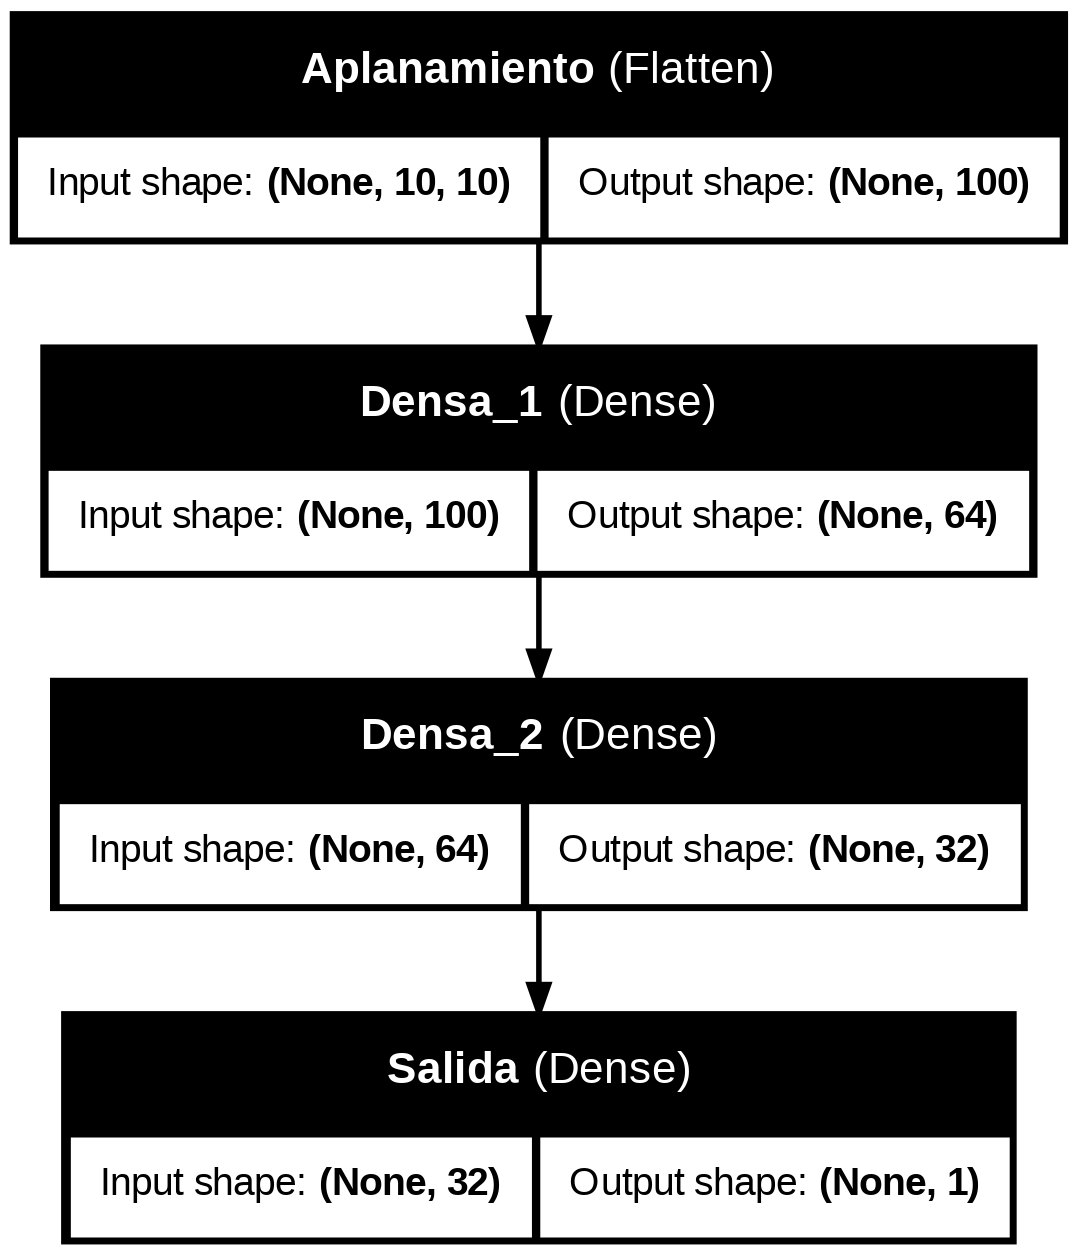

In [ ]:
# Para visualizar el modelo usando plot_model y activamos el nombre de capas
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

En el entorno de Keras, también es posible la construcción de modelos neuronales convolucionales, ideales para tareas de visión por computadora y procesamiento de imágenes. Para lograr esto, la librería proporciona capas específicas denominadas `Conv2D`. En este tipo de capas se determina el número de filtros, la dimensión del kernel y la naturaleza de la función de activación. Para complementar la acción de las capas de convolucióny disminuir la dimensión también se tienen capas de *pooling*. Entre estas capas se detalla `MaxPooling2D` la cual utiliza la estrategia de tomar el valor máximo en una ventana específica, para esta capa se debe fijar la dimensión de la ventana. A continuación exploraremos cómo utilizar estas capas para construir modelos neuronales convolucionales.

In [ ]:
"""
En este apartado se crea un modelo neuronal para clasificación con 10 clases.
Este modelo se diseña con capas convolucionaes para una entrada de dimensión 2D de tamaño
100x100 con tres canales, estas entradas pueden representar imágenes la dimensión serán
los pixeles y los canas el color, en general las imágenes a color tienen 3 canales (RGB)
(rojo, verde, azul). El siguiente modelo se construye con 2 capas
convolucionales, seguidas de una capa de pooling y con una salida de 10 neuronas.
"""

# Llamado al clase secuencial para la inicialización del modelo
model = Sequential(name = 'Modelo CNN')

# Capa de entrada, para las dimensiones 100x100 con 3 canales
model.add(Input(shape=(100, 100, 3)))

# Capas de convolución
# En la primera capa convolucional se utiliazan 32 filtros con un kernel de dimensión 3x3
# esto significa que nuestra entrada, la cual se puede pensar como 3 matrices de 100x100,
# luego de pasar por la capa de convolución será 32 canales.
# En cada filtro se usa un kernel de 3x3, esto quiere decir que se necesitan 9 parámetros
# por determinar en cada filtro. Al ser 32 filtros entonces se requieren determinar 288
# parámetros por cada canal, dado que se tienen 3 canales el número de parámetros sera 864.
# además de estos parámetros también se deben considerar los sesgos, uno por cada filtro,
# en total son 32. De modo que el tamaño total de los parámetros en la capa de convolución
# es de 32*9*3 + 32 = 896.
# Dado que en la capa no se incluyo una técnica de relleno se elimina una fila arriba y
# una abajo y lo mismo sucede con la columnas. Por esta razón la dimensión de salida es
# 98x98x32.
model.add(Conv2D(32, (3, 3), activation='relu'))

# Capa de pooling
# Para disminuir la dimensión de los datos se complementa usando una capa de MaxPooling
# la capa requiere la dimensión de la ventana sobre la cual se hará la reducción. Al elegir
# una ventana de 2x2 entonces la dimensión de salida será 49x49x32. Esta capa solo realiza
# una operación no requiere parámetros de entrenamiento.
model.add(MaxPooling2D((2, 2)))

# Capa de convolución
# En la segunda capa convolucional se utilizaran 64 filtros y un kernel de 3x3 por lo tanto
# la salida de esta capa sera 47x47x64. El número de parámetros se calcula igual que en el
# caso anterior, multiplicando la dimensión previa de los canales 32 por el numero de filtros
# de la capa, por los parámetros del kernel. En este caso sería 32*64*3*3 = 18432, y se
# suman los sesgos que son uno por filtro es decir 64, de modo que el número de parámetros
# es 18432 + 64 = 18496.
model.add(Conv2D(64, (3, 3), activation='relu'))

# Capa de pooling
# Esta capa se fija con dimensión 2x2 entonces reduce las dimensiones a la mitad entera
# las nuevas dimensiones serán 23x23x64.
model.add(MaxPooling2D((2, 2)))

# Ahora se ubica una capa de aplanamiento, la cual condesa en un solo vector 1D la salida
# con dimensiones 23x23x64.
model.add(Flatten())

# Al final se añade una capa densa de 128 neuronas
model.add(Dense(128, activation='relu'))

# La capa de salida se fija con tantas neuronas como clases y función de activación
# softmax.
model.add(Dense(10, activation='softmax'))

In [ ]:
# Con el método summary se puede revisar el número de parámetros en cada capa
# y las dimensiones.
model.summary()

Model: "Modelo CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,354,378 (16.61 MB)

 Trainable params: 4,354,378 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

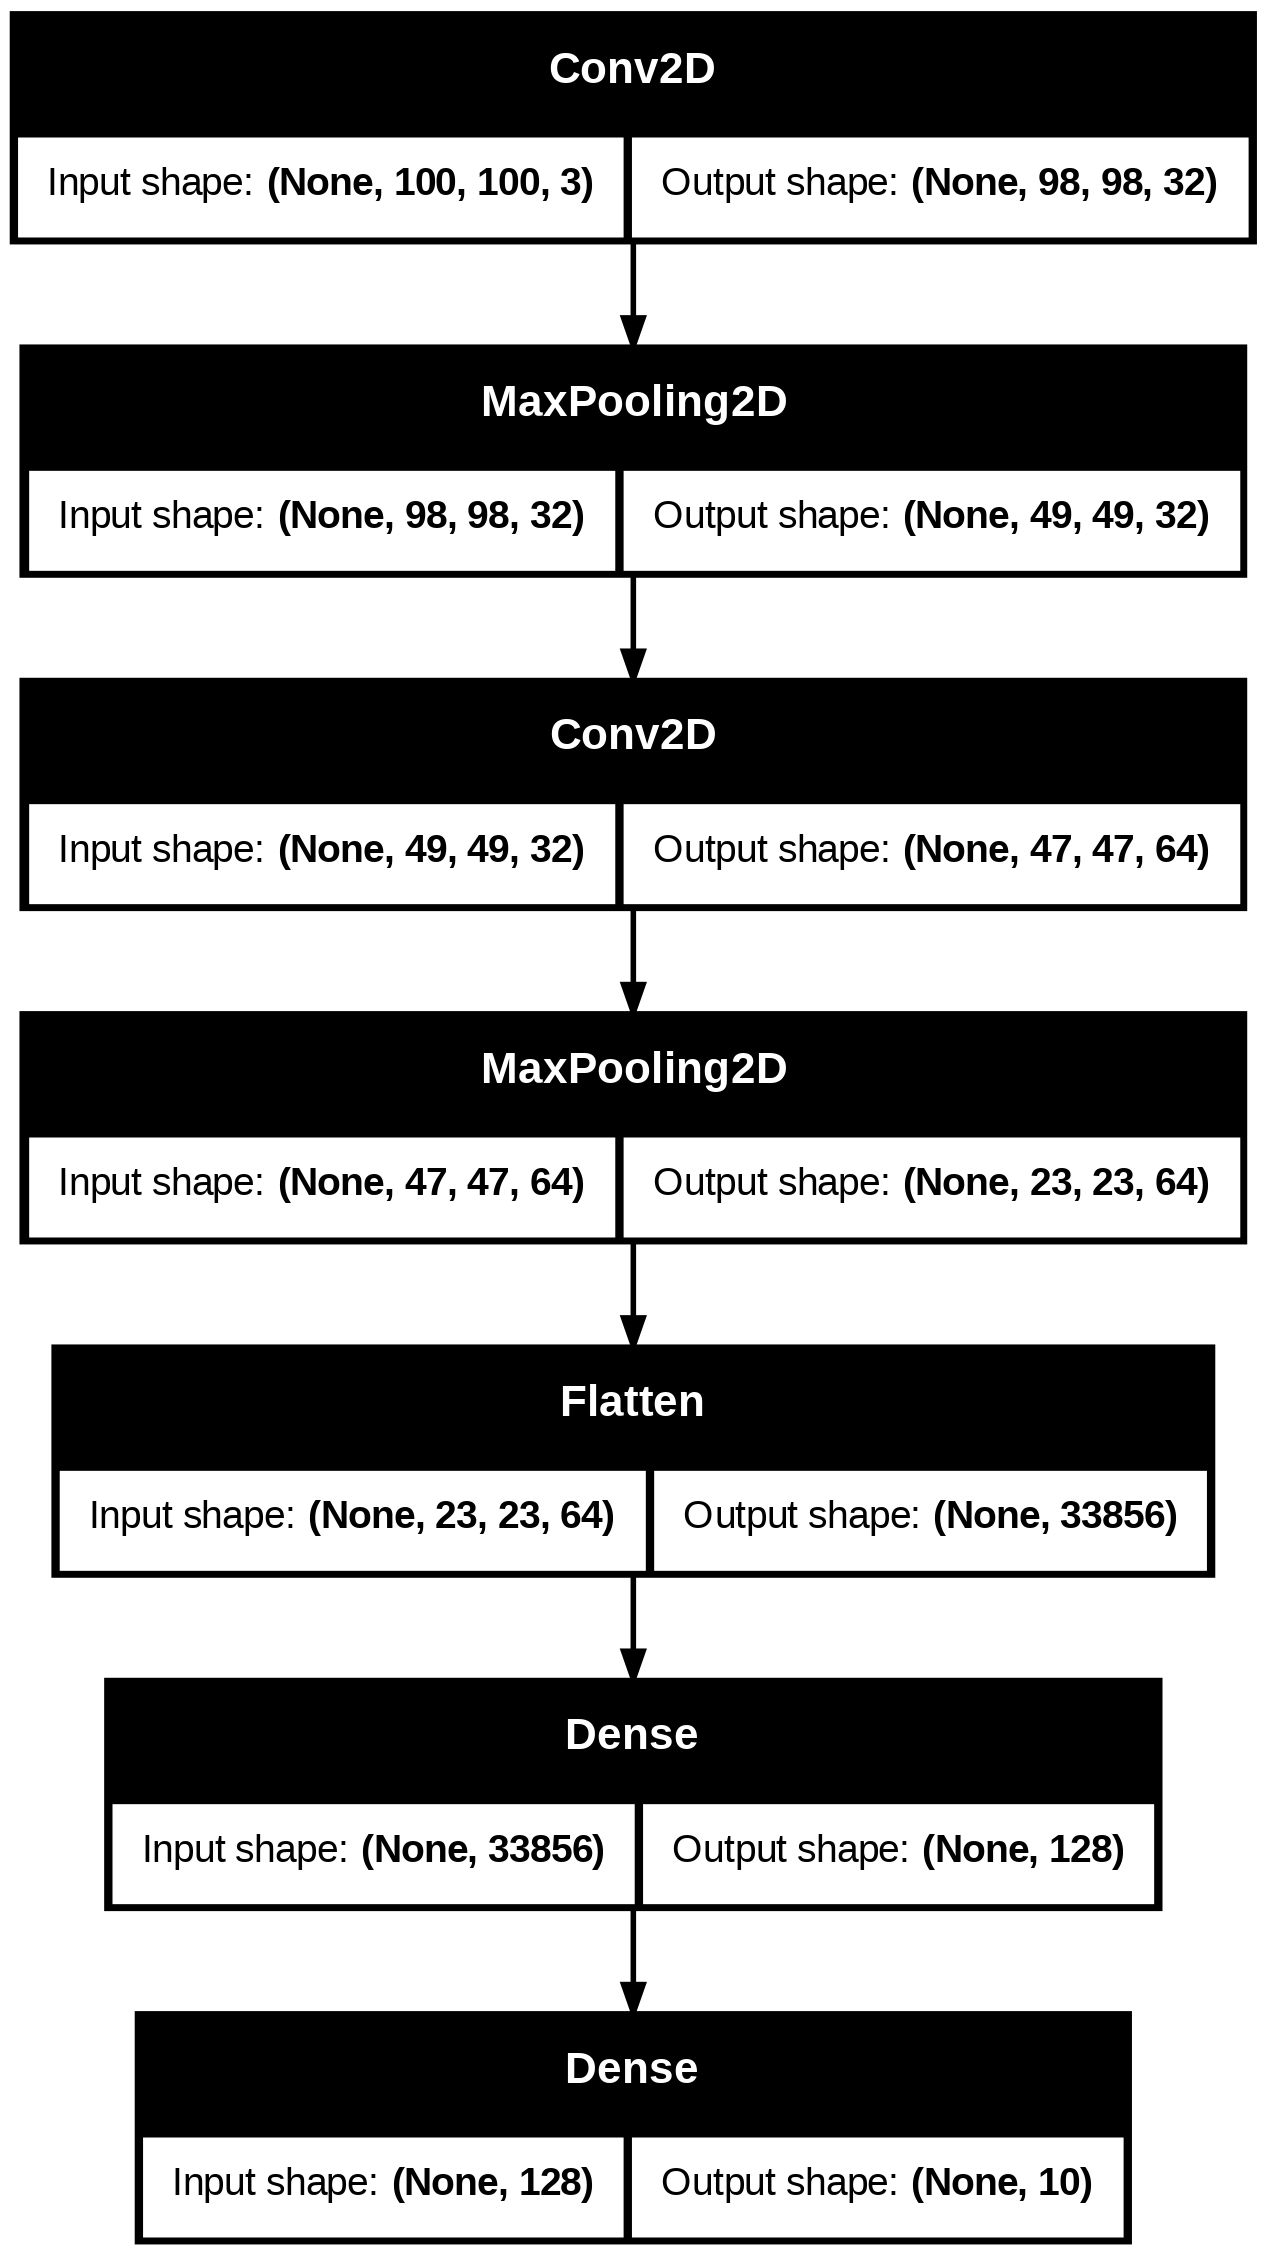

In [ ]:
# Para visualizar el modelo usando plot_model y activamos el nombre de capas
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

En las capas convolucionales tambien se puede agregar condicones de *padding* y *strides*. Al seleccionar `padding='same'` se agrega relleno a la entrada para que la salida tenga la misma altura y anchura. El relleno garantiza que no perdamos información en los bordes de la imagen durante la convolución. Por su parte los *strides* indican cuántos píxeles se desplaza el filtro en cada paso.

In [ ]:
"""
En este apartado se crea un modelo neuronal para clasificación con 10 clases.
Este modelo se diseña con capas convolucionaes para una entrada de dimensión 2D de tamaño
64x64 con tres canales. El siguiente modelo se construye con 1 capa convolucional,
que incluye el parámetro padding y strides. La salida del modelo son 10 neuronas y función
de activación softmax.
"""

# Llamado al clase secuencial para la inicialización del modelo
model = Sequential()

# Capa de entrada, para las dimensiones 100x100 con 3 canales
model.add(Input(shape=(100, 100, 3)))

# Capa de convolución con padding y stride, strides=(2, 2) indican que el filtro se
# desplaza dos posiciones en filas y en columnas a la vez.
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2)))

# Capa de MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa de aplanamiento
model.add(Flatten())

# Capa totalmente conectada
model.add(Dense(64, activation='relu'))

# Capa de salida
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 20000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     1,280,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281,610 (4.89 MB)

 Trainable params: 1,281,610 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

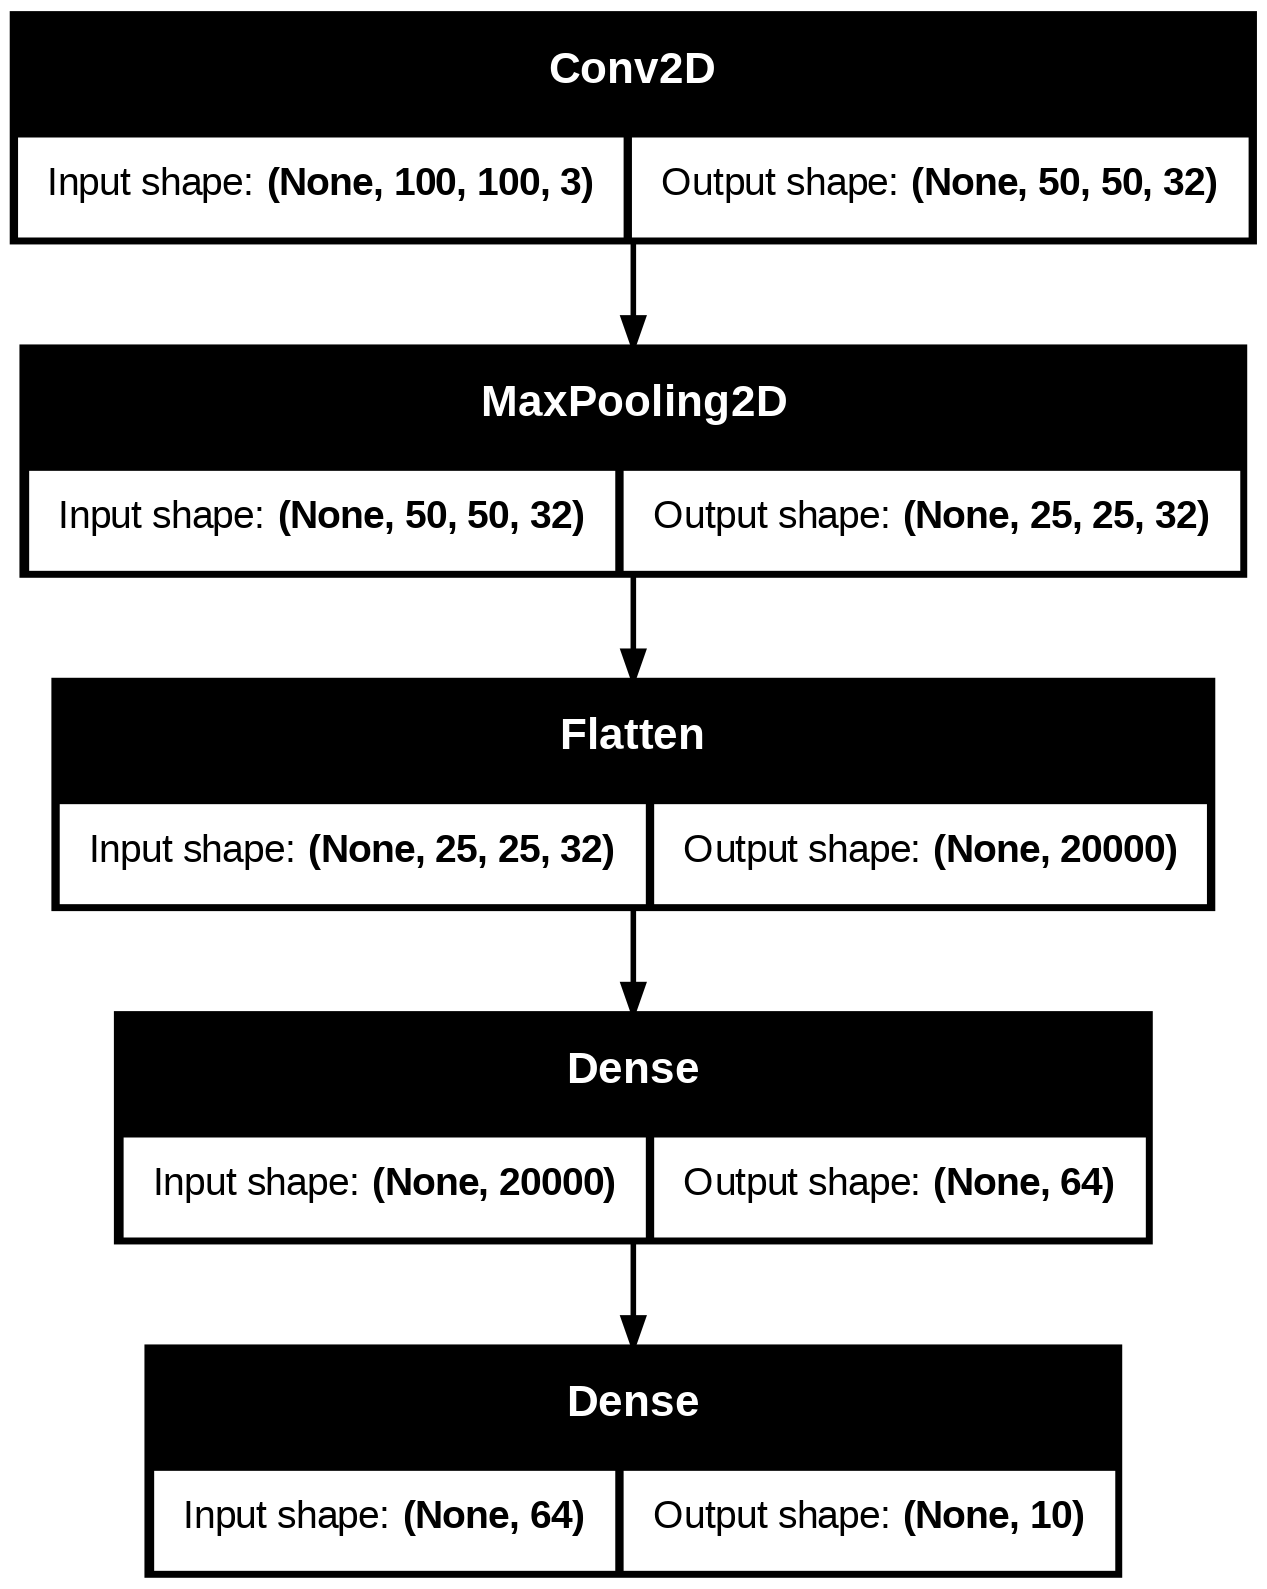

In [ ]:
# Para visualizar el modelo usando plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

## 1.2 Compilación del modelo neuronal

En la sección anterior, hemos construido la arquitectura de nuestro modelo neuronal en Keras, definiendo las capas y la estructura de la red. Una vez completado este proceso, el siguiente paso es la compilación del modelo. Esta etapa es fundamental ya que permite definir condiciones específicas de entrenamiento del modelo. En general las configuraciones más relevantes en la compilación se enfocan en determinar la función de pérdida, el optimizador y las métricas que se usaran para determinar el rendimiento del modelo.

### Función de pérdida

En Keras, puedes seleccionar la función de pérdida apropiada según el tipo de problema que estés resolviendo. Por ejemplo, para problemas de clasificación, la función de pérdida comúnmente utilizada es categorical_crossentropy, mientras que para problemas de regresión se suele usar mean_squared_error. La elección de la función de pérdida depende de la naturaleza de tu tarea.

- `mean_squared_error`: Error cuadrático medio, ideal para problemas de regresión.
- `binary_crossentropy`: Entropia cruzada binaria, ideal para problemas de clasificación binaria.
- `categorical_crossentropy`: Entropia cruzada categorica, ideal para problemas de clasificación multiclase.
- `sparse_categorical_crossentropy`: Entropia cruzada categorica dispersa, ideal en problemas de clasificación cuando las etiquetas son enteros.

In [ ]:
# Para compilar el modelo se usa el método .compile
# el método permite definir el optimizador, en el atributo optimizer
# también la función de pérdida loss y las métricas.
# En este caso se definió un optimizador, de función de pérdida el error cuadrático medio
# y como métricas de validación la precisión.
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

### Optimizadores

En el proceso de entrenamiento de redes neuronales, el método de backpropagation es la base para ajustar los pesos del modelo a medida que aprende de los datos. Sin embargo, existen variaciones en la forma en que se implementa este proceso, y estas variaciones dan lugar a los optimizadores. Keras ofrece una amplia gama de optimizadores populares, como SGD (Descenso de Gradiente Estocástico), Adam, RMSprop, entre otros.

Todos estos optimizadores se fundamentan en backpropagation la metodología especifica de cada uno se puede consultar en https://keras.io/api/optimizers/. Es importante mencionar que, para cada optimizador, se pueden definir hiperparámetros adicionales, como la tasa de aprendizaje y otros ajustes específicos del optimizador. Estos hiperparámetros influyen en la velocidad y eficacia del proceso de entrenamiento y pueden ser sintonizados para optimizar el rendimiento del modelo.

In [ ]:
# Para establecer el optimizador especifico se llama de la clase optimizers
# los métodos que se desen, en este saco se esta importanto SGD, Adam y RMSprop
from keras.optimizers import SGD, Adam, RMSprop

In [ ]:
# Para establecer el optimizador se debe llamar a la clase y establecer sus hiper-parámetros
# aquí se detallan algunos ejemplos.

# Optimizador SGC, este optimizador permite establecer entre sus hiper-parámetros la
# tasa de aprendizaje en el atributo learning_rate
my_optimizerSGD = SGD(learning_rate=0.1)

# Optimizador Adam, este optimizador permite establecer entre sus hiper-parámetros la
# tasa de aprendizaje en el atributo learning_rate, y las constantes beta_1 y beta_2
# en la documentación de la librería se puede consultar la rutina especifica del optimizador
# y el efecto de estos hiper-parámetros.
my_optimizerAdam = Adam(learning_rate = 0.001, beta_1 = 0.9,beta_2 = 0.89,)

# Optimizador RMSprop, este optimizador permite establecer entre sus hiper-parámetros la
# tasa de aprendizaje en el atributo learning_rate.
my_optimizerRMSprop = RMSprop(learning_rate=0.001)

# Si algún optimizador quiere configuarse por defecto solo se llama a la clase y no se pasan
# valores, esto generar la clase con la configuración preestablecida. Por ejemplo:

my_optimizer = SGD()

In [ ]:
# Cuando se construye la clase del optimizador se ingresa al modelo en el método compile.
model.compile(optimizer=my_optimizer, # Especificamente en esta propiedad se agrega el optimizador
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Métricas

Las métricas son utilizadas para evaluar el rendimiento del modelo durante el entrenamiento y la evaluación. Puedes definir métricas que te ayuden a comprender cómo se desempeña el modelo en términos de precisión, pérdida u otras estimaciones relevantes para la tarea específica. Estas métricas proporcionarán información  sobre el progreso del entrenamiento y la calidad de las predicciones. En Keras, puedes definir métricas de diferentes maneras. Puedes utilizar la clase `.metrics` o simplemente anotar el nombre de la métrica. A continuación, se presenta un ejemplo que incluye ambos casos en el método `.compile`.

In [ ]:
from keras.metrics import Precision, Recall # Las métricas se importan de las diferentes disponibles

# Compila el modelo especificando las métricas
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[Precision(), Recall()])

# Otra forma de definir métricas: anotando su nombre
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mean_squared_error'])

# Tambien se puede generar métricas combinando por nombre o por clase
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# 2. Conjunto de datos MNIST

A continuación vamos a explorar el conjunto de datos MNIST, una base de datos icónica de imágenes que representa la escritura manual de dígitos del 0 al 9. El conjunto de datos MNIST es ampliamente utilizado en el campo del aprendizaje automático y la visión por computadora como una referencia para tareas de clasificación. Utilizaremos este conjunto de datos para entrenar nuestros modelos convolucionales.

Dentro de la librería Keras, tenemos acceso directo al conjunto de datos MNIST, una colección de 70,000 imágenes. De este conjunto, 60,000 imágenes se destinan al entrenamiento de modelos, mientras que las 10,000 restantes se reservan para pruebas y evaluación de rendimiento. Las imágenes tienen una dimensión de 28x28 píxeles y se presentan en un solo canal de color.

In [ ]:
# Para importar el conjunto tomamos la clase .datasets de keras y llamamos a mnist
from keras.datasets import mnist

In [ ]:
# Importa la función to_categorical desde keras.utils para realizar la codificación
# one-hot de etiquetas.En tareas de clasificación multiclase, como el conjunto de datos
# MNIST, las etiquetas pueden ser valores numéricos. Sin embargo, para entrenar modelos de
# clasificación eficientes, es conveniente codificar estas etiquetas en representaciones
# binarias, creando vectores de 10 posiciones donde cada posición representa la
# pertenencia a una clase específica. Esta codificación one-hot facilita la implementación
# de la red neuronal, donde se asignarán 10 neuronas a la capa de salida, y se utilizará
# la función de entropía cruzada para medir la discrepancia entre las predicciones del
# modelo y las etiquetas reales.

from keras.utils import to_categorical

In [ ]:
def load_data():
  """
  Esta función carga al entorno de trabajo los datos de entrenamiento, y prueba. Con sus
  etiquetas codificadas con one-hot.
  Parámetros de entrada:
  mnist = Clase de Keras.datsets con el conjunto de datos mnist
  Parámetros de salida:
  X_train = Conjunto de datos para entrenamiento
  X_test = Conjunto de datos para prueba
  y_train_onehot = Etiquetas del conjunto de entrenamiento codificadas en one-hot
  y_test_onehot = Etiquetas del conjunto de prueba codificadas en one-hot
  y_train = Etiqueta original del conjunto de entrenamiento
  y_test = Etiqueta original del conjunto de prueba
  """

  # Establecer el conjunto de entrenamiento y el conjunto de prueba con sus respectivas
  # etiquetas
  (X_train, y_train), (X_test, y_test) = mnist.load_data()

  # Normalización de los valores de los pixeles de las imágenes
  X_train, X_test = X_train / 255.0, X_test / 255.0

  # Codificación One-Hot para las etiquetas
  y_train_onehot = to_categorical(y_train)
  y_test_onehot =  to_categorical(y_test)

  print(f'Conjunto de datos cargados')
  print(f'Tamaño imágenes de entrenamiento {X_train.shape}')
  print(f'Tamaño imágenes de test {X_test.shape}')
  print(f'Datos por cada etiqueta en X train {np.bincount(y_train)}')

  return X_train, X_test, y_train_onehot, y_test_onehot, y_train, y_test

In [ ]:
# En esta linea de código se ejecuta la función de cargue de datos
X_train, X_test, y_train_onehot, y_test_onehot, y_train, y_test = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Conjunto de datos cargados
Tamaño imágenes de entrenamiento (60000, 28, 28)
Tamaño imágenes de test (10000, 28, 28)
Datos por cada etiqueta en X train [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [ ]:
def visualizationInstances(X_data, y_data):
  """
  Esta función visualiza una instancia de cada categoria del conjunto mnist
  Parámetros de entrada:
  X_data = Instancias
  y_data = Etiquetas
  Parámetros de salida:
  Grafica con la visualización de la imagen por cada isntancia.
  """
  fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10, 5))
  ax = ax.flatten()
  for i in range(10):
    img = X_data[y_data == i][0]
    ax[i].imshow(img, cmap='gist_yarg')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
  return plt.show()

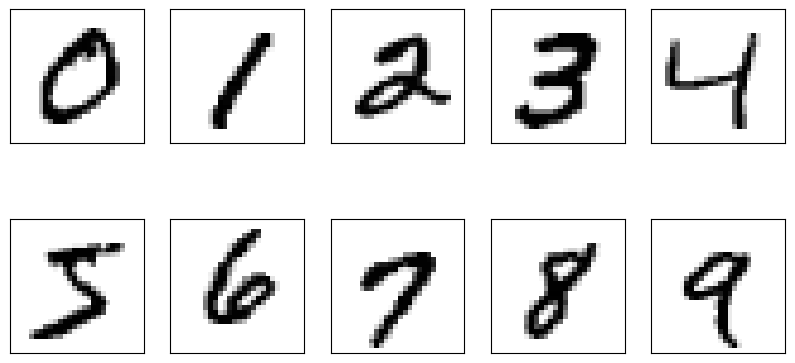

In [ ]:
visualizationInstances(X_train, y_train)

## 2.1 Modelo neuronal para clasificación MNIST

Para el conjunto de datos MNIST se realiza un modelo neuronal convolucional, este modelo se construye con la función `load_model(name)`. El modelo se compila y se entrena con los datos que se han separado previamente. Además se muestran las gráficas del entrenamiento con las métricas seleccionadas y se efectua la validación con el conjunto de prueba.

In [ ]:
def load_model(name):
  """
  Esta función construye un modelo neuronal convolucional para el problema de clasificación
  con MNIST. Este modelo se construye con dos capas convolucionales seguidas de una capa de
  pooling cada una.

  Parámetros:
  name = nombre del modelo

  Salida:
  model = modelo neuronal convolucional en Keras
  """
  # Inicio del modelo con el nombre pasado por parámetro
  model = Sequential(name = f'{name}')

  # Capa de entrada dimensiones consistentes con las dimensiones de las imágenes de MNIST
  model.add(Input(shape=(28, 28, 1), name = 'Nombre capa1'))

  # Primera capa convolucinal Kernel de 3x3 y 16 filtros
  model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
  # Capa de MaxPooling
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # # Segunda capa convolucinal Kernel de 3x3 y 32 filtros
  # model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  # # Capa de MaxPooling
  # model.add(MaxPooling2D(pool_size=(4, 4)))

  # Capa de aplanamiento
  model.add(Flatten())

  # Capa totalmente conectada con 64 neuronas
  model.add(Dense(100, activation='relu'))

  # Capa de salida
  model.add(Dense(10, activation='softmax'))

  return model

In [ ]:
# Llamado a la función de cargar modelo con parámetro el nombre
model = load_model('ModeloClasificacionMNIST')

In [ ]:
# Resumen de las dimensiones y parámetros del modelo
model.summary()

Model: "ModeloClasificacionMNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,870 (1.20 MB)

 Trainable params: 314,870 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

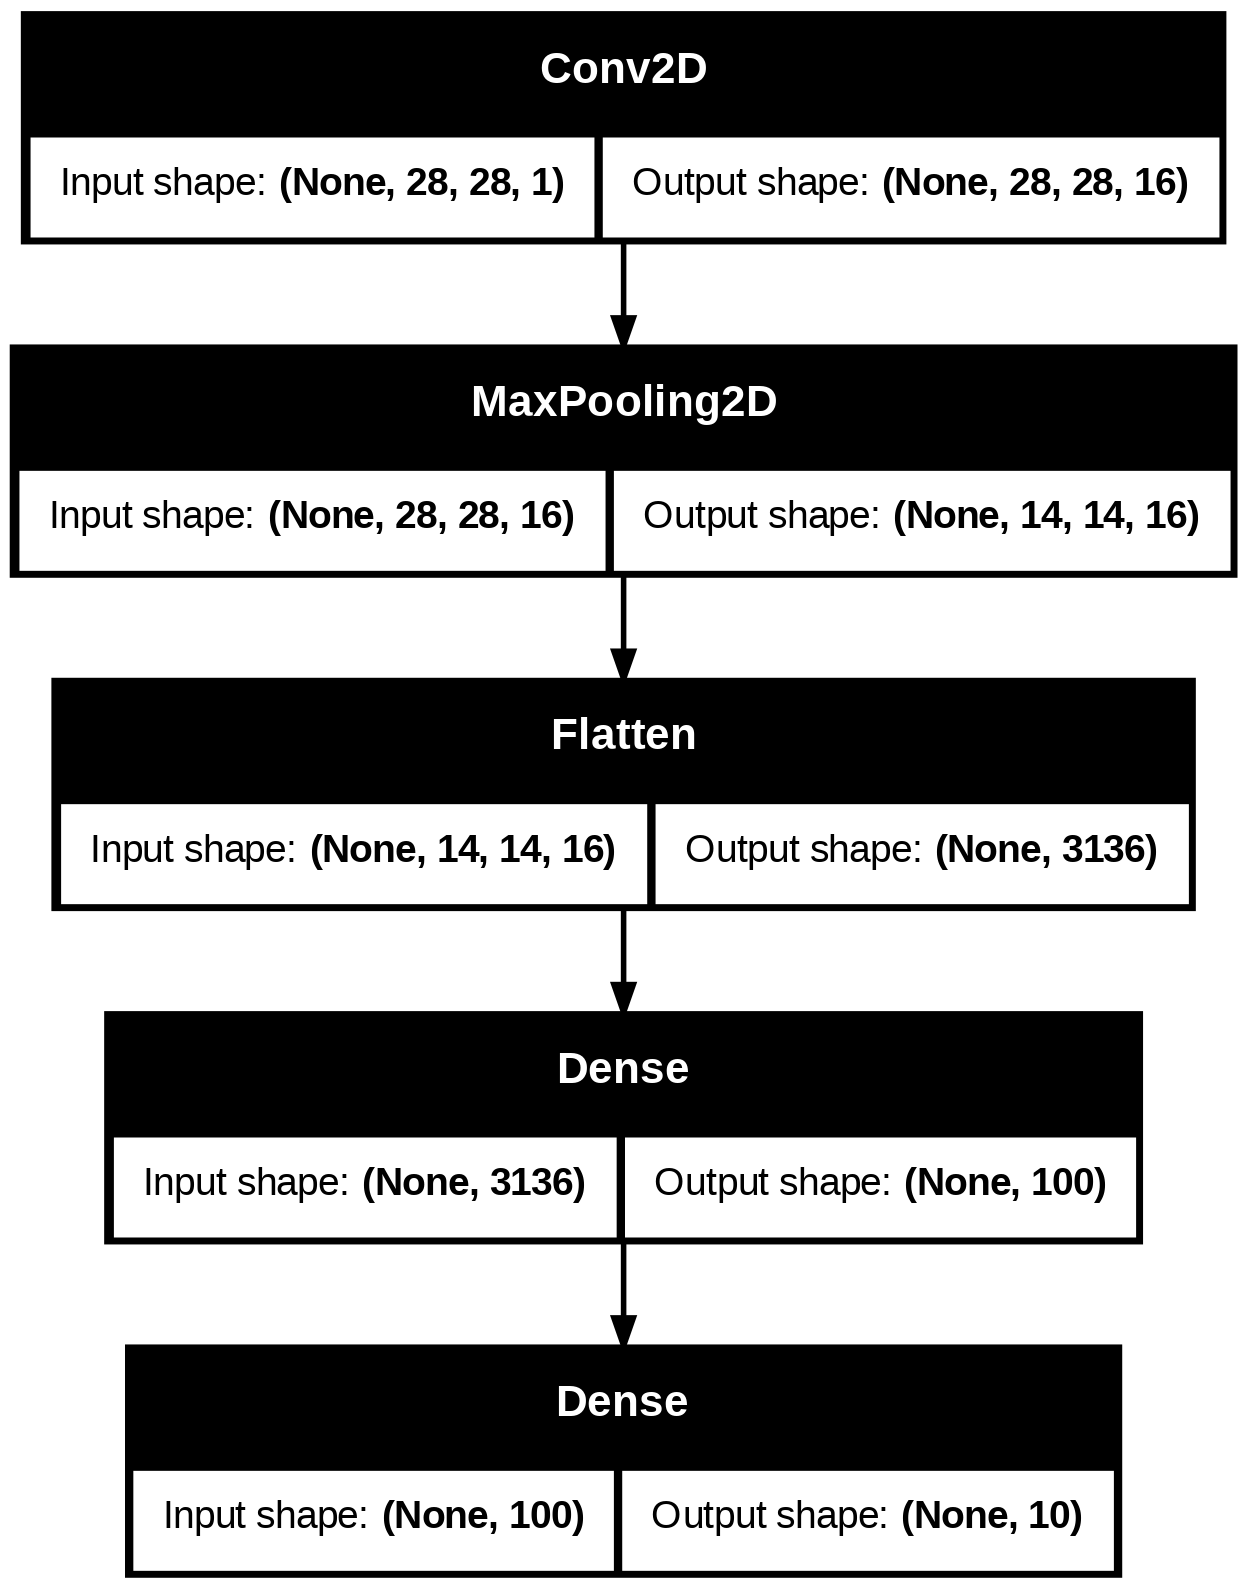

In [ ]:
# Para visualizar el modelo usando plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

Una vez que hemos definido la arquitectura de nuestro modelo, el siguiente paso es la compilación. Dado que estamos abordando un problema de clasificación multiclase, se sugiere utilizar de la función de pérdida `categorical_crossentropy`, adecuada para tareas de clasificación multiclase. Además, hemos optado por el optimizador `Adam` y para evaluar el rendimiento del modelo, hemos seleccionado la métrica de precisión, tanto en el conjunto de entrenamiento como en el de validación.

In [ ]:
# Compilar el modelo
# loss =  categorical_crossentropy, entropia cruzada categorica
# optimizer = adam, configurado con sus parámetros por defecto
# metrics = precisión

### BEGIN READ ONLY
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
### END READ ONLY

## 2.2 Entrenamiento del modelo neuronal para MNIST

En el proceso de entrenamiento de modelos en Keras, se utiliza el método `.fit()`, este método del modelo neuronal requiere tanto el conjunto de entrenamiento como sus etiquetas correspondientes. Además de los datos de entrenamiento, se pueden configurar parámetros esenciales, como el número de épocas que determina cuántas veces se presentan los datos al modelo y el tamaño del lote que se realiona con la cantidad de ejemplos de entrenamiento que se utilizan en cada iteración durante el proceso de entrenamiento del modelo. Además se puede proporcionar un conjunto de validación opcional que permite evaluar el rendimiento del modelo a lo largo del proceso de entrenamiento y supervisar su capacidad de generalización en datos no vistos.

In [ ]:
# Entrenamiento del modelo
# El método .fit recibe los datos de entrenamiento
# tambien permite configurar el número de épocas en el atributo epochs
# adicionalmente el conjunto de validación. El método tambien tiene otros parámetros
# adiconales estos pueden ser consultados en la documentación oficial de la librería.

# El método fit retorna una salida que contiene un objeto con los atributos history, model
# epochs, el atribulo history guarda a través de las épocas las métricas tanto para
# entrenamiento como validación.

### BEGIN READ ONLY
resultsFit = model.fit(X_train, y_train_onehot,
                    epochs=15,
                    batch_size = 32,
                    validation_data=(X_test, y_test_onehot))
### END READ ONLY

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9026 - loss: 0.3427 - val_accuracy: 0.9738 - val_loss: 0.0798
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9797 - loss: 0.0657 - val_accuracy: 0.9834 - val_loss: 0.0504
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9874 - loss: 0.0399 - val_accuracy: 0.9855 - val_loss: 0.0449
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0260 - val_accuracy: 0.9827 - val_loss: 0.0494
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9945 - loss: 0.0183 - val_accuracy: 0.9841 - val_loss: 0.0468
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9962 - loss: 0.0125 - val_accuracy: 0.9854 - val_loss: 0.0483
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9960 - loss: 0.0120 - val_accuracy: 0.9846 - val_loss: 0.0555
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9980 - loss: 0.0067

## 2.3 Evaluación del modelo y visualización de sus métricas

El hisotoria de la métrica de precisión se grafica a continuación.  Esta visualización proporciona una representación gráfica de cómo el modelo está aprendiendo y si está mejorando en la tarea de clasificación a medida que se ajustan los pesos y se repiten las épocas. Al observar estas curvas de precisión a lo largo del tiempo, los practicantes de aprendizaje automático pueden identificar patrones de convergencia, sobreajuste o subajuste. Para realizar la grafica se ejecuta la función `visualization_history(history)`.

In [ ]:
# En el objeto resultsFit en su atributo history guarda las métricas por época de
# perdida 'loss', precisión 'accuracy', pérdida en validación 'val_loss' y precisión
# en validación 'val_accuray'

# Estas métricas se guardan como un diccionario, del cual se pueden ver las llaves con la
# instrucción.
resultsFit.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
def visualization_history(resultsFit):
  """
  Esta función grafica las curvas de precisión a lo largo de las épocas de entrenamiento
  para el conjunto de prueba como el de validación.
  Parámetros:
  resultsFit = historial de entrenamiento de un modelo en keras
  Salida:
  Gráfica de la precisión en validación y prueba.
  """
  # Llamado al entrono de la gráfica y fijar tamaño de visualización
  fig, axes = plt.subplots(1, 2, figsize=(13, 5))

  # Graficar la presición de la historia en entrenamiento
  axes[0].plot(range(len(resultsFit.history['accuracy'])), resultsFit.history['accuracy'],
           '#5a2ff4', linestyle = "-", marker = "o",
           label='Precisión entrenamiento', lw = 3)

  # Graficar la presición de la historia en validación
  axes[0].plot(range(len(resultsFit.history['val_accuracy'])), resultsFit.history['val_accuracy'],  '#60d13e',
           label='Precisión validación', linestyle = '-', marker = 'o', lw = 3)

  # Títulos de los ejes
  axes[0].set_xlabel('Época',fontsize=16)
  axes[0].set_ylabel(r'Precisión',fontsize=16)
  axes[0].set_ylim(top=1) # Límite de la grafica
  axes[0].grid()      # Activar la cuadricula
  axes[0].legend(fontsize=14,loc = 'lower right')   # Establecer la legenda


   # Graficar la pérdida de la historia en entrenamiento
  axes[1].plot(range(len(resultsFit.history['loss'])), resultsFit.history['loss'],
           '#5a2ff4', linestyle = "-", marker = "o",
           label='Pérdida entrenamiento', lw = 3)

  # Graficar la presición de la historia en validación
  axes[1].plot(range(len(resultsFit.history['val_loss'])), resultsFit.history['val_loss'],  '#60d13e',
           label='Pérdida validación', linestyle = '-', marker = 'o', lw = 3)

  # Títulos de los ejes
  axes[1].set_xlabel('Época',fontsize=16)
  axes[1].set_ylabel(r'Precisión',fontsize=16)
  axes[1].grid()      # Activar la cuadricula
  axes[1].legend(fontsize=14,loc = 'upper right')   # Establecer la legenda


  plt.tight_layout() # Ajusta automáticamente el diseño de la figura
  plt.show()

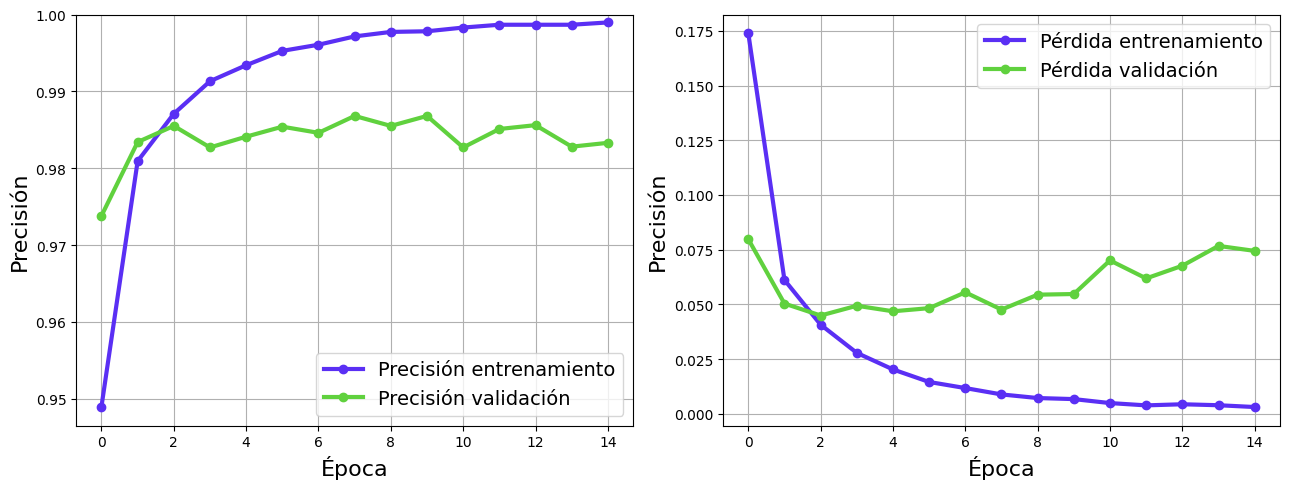

In [ ]:
# Llamado a la función de visualización de las métricas de la historia del entrenamiento
# del modelo, en la prrimera gráfica se presenta la precisión y en la segunda la pérdida
visualization_history(resultsFit)

In [ ]:
# Evaluación del modelo en el conjunto de prueba
results = model.evaluate(X_test, y_test_onehot)

# Los resultados contendrán los valores de las métricas definidas, por ejemplo, pérdida y precisión.
print(f'Pérdida en el conjunto de prueba: {results[0]:0.2f}')
print(f'Precisión en el conjunto de prueba:{results[1]:0.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9786 - loss: 0.0985
Pérdida en el conjunto de prueba: 0.07
Precisión en el conjunto de prueba:0.98


---------------